In [169]:
# Import packages
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import mpctools.extensions.mplext
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Question 4: (30 points) Exploratory Analysis

In [170]:
# Load dataset
bristol_air = pd.read_csv('BristolAir_Exploratory.csv', compression='bz2')

In [171]:
bristol_air.head()

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.00,28.00,28.75,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.50,32.00,32.50,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.00,97.75,68.00,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.80,39.52,44.52,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.78,31.94,54.67,8,51.489993,-2.688779


## 4.1 (6 points)

In [172]:
print("Dataset shape: {}".format(bristol_air.shape))
print("Number of instances: {}".format(bristol_air.shape[0]))
print("Number of attributes: {}".format(bristol_air.shape[1]))

Dataset shape: (1306758, 7)
Number of instances: 1306758
Number of attributes: 7


In [173]:
bristol_air.describe()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


In [174]:
bristol_air.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306758 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1306758 non-null object
NOx          1191220 non-null float64
NO2          1188426 non-null float64
NO           1197536 non-null float64
SiteID       1306758 non-null int64
Loc.Lat      1306758 non-null float64
Loc.Long     1306758 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.8+ MB


In [175]:
max(bristol_air['Loc.Long'])

-2.5352302745900004

In [176]:
bristol_air[bristol_air['SiteID']==1]

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
12,2006-07-22 02:00:00+00:00,28.000000,16.000000,1.750000,1,51.441747,-2.559956
13,2006-07-22 22:00:00+00:00,53.000000,19.750000,14.750000,1,51.441747,-2.559956
27,2007-10-26 20:00:00+00:00,138.250000,30.250000,59.750000,1,51.441747,-2.559956
39,2014-01-16 16:00:00+00:00,135.250000,66.250000,45.250000,1,51.441747,-2.559956
45,2014-01-18 12:00:00+00:00,39.750000,22.250000,11.500000,1,51.441747,-2.559956
49,2014-02-02 00:00:00+00:00,14.250000,9.000000,3.500000,1,51.441747,-2.559956


In [177]:
len(bristol_air["Loc.Lat"].unique())

17

In [178]:
len(bristol_air["SiteID"].unique())

18

In [179]:
bristol_air.isna().any()

Date Time    False
NOx           True
NO2           True
NO            True
SiteID       False
Loc.Lat      False
Loc.Long     False
dtype: bool

In [180]:
missing_data = bristol_air[bristol_air.isna().any(axis=1)]

In [181]:
len(missing_data)

118872

In [182]:
negative_data = bristol_air[(bristol_air['NOx'] < 0) | (bristol_air['NO2'] < 0) | (bristol_air['NO'] < 0)]
len(negative_data)

576

The Bristol Air Exploratory dataset has 1,306,758 instances and 7 attributes. Attributes  Loc.Lat* and *Loc.Long* are all of type float. , and attribute SiteID is an integer.

Attribute *Date Time* is of type object and states the exact date and time that the air quality data stated in that row was retrieved. The values of *Date Time* range from '1993-01-01 00:00:00+00:00' to '2019-08-12 09:00:00+00:00'.

We observe from our dataset that the attributes *NOx, NO2, NO* are the most problematic given that some entries have missing data and others have negative values. In general, they refer to the amount of each of those chemicals in the air in Bristol, and they are all of type float. NOx refers to all of the most relevant nitrogen oxides for air pollution, such as NO2 and NO. The generic term NOx ranges from -31.08 to 2164.25. NO2 ranges over -6.6698 and 576.5, while NO intervals between -17.71 and 1231.24. However, it seems that there are some outliers in all of these three attributes given that according to their unit of measure μg/m3, they can only have positive values. There are 576 readings with negative values in at least one of these three attributes. Regarding the missing data, by using the .isna() function we obtain that there are 118872 instances with missing NOx, NO2 or NO values. These problematic values for these three specific attributes are unreasonable in our dataset due to the fact that our dataset focuses mainly on air pollution, and without these values we cannot analyse the data.

Regarding missing data, by using the functions .isna().any() we observe that indeed, only the three gas attributes have NaN values.

Concerning attribute *SiteID*, it is an integer valued attribute that uniquely identifies air pollution entries from the same location. In other words, all the data retrieved from the same location has the same SiteID. The location attributes, Loc.Lat and Loc.Long, are of type float that define the coordinates of the locations. Minimum value for the latitude is approximately 51.43, while the maximum is 51.49. As for the longitude, the minimum is -2.69 and maximum is -2.54. Using the .unique() function, we see that we only have 18 different locations in our dataset, all of them around the Bristol area.


## 4.2 (6 points)

In [183]:
# missing_data.groupby('SiteID').SiteID.value_counts()

## Percentage of negative samples out of all the negative samples over all sites, or out of all the samples for that site??????

#### TODO: duplicated code, create a function for both missing and negative to generate the counts and percentages, CREATE ONE DF ONLY

In [184]:
# Per-site basis

# Missing data
missing_data = bristol_air[bristol_air.isna().any(axis=1)]
# Compute number of samples and percentages
missing_counts = missing_data.SiteID.value_counts().sort_index()
missing_percentages = missing_data['SiteID'].value_counts(normalize=True).sort_index() * 100
# Convert pandas series to dataframe
missing_SiteID = missing_counts.rename_axis('SiteID').to_frame('# of Samples')
# Concatenate percentages series to the df
missing_SiteID = pd.concat((missing_SiteID, missing_percentages.rename('Percentage %')), axis=1)
# Generate latex table from dataframe
missing_SiteID.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  \\# of Samples &  Percentage \\% \\\\\nSiteID &               &               \\\\\n\\midrule\n0      &           104 &      0.087489 \\\\\n1      &         10260 &      8.631133 \\\\\n2      &          2739 &      2.304159 \\\\\n3      &         19692 &     16.565718 \\\\\n4      &          1547 &      1.301400 \\\\\n5      &         10060 &      8.462884 \\\\\n6      &         10581 &      8.901171 \\\\\n7      &          4831 &      4.064035 \\\\\n8      &          9228 &      7.762972 \\\\\n9      &          1170 &      0.984252 \\\\\n10     &          3461 &      2.911535 \\\\\n11     &           394 &      0.331449 \\\\\n12     &          7910 &      6.654216 \\\\\n13     &          6393 &      5.378054 \\\\\n14     &         12001 &     10.095733 \\\\\n15     &          2712 &      2.281446 \\\\\n16     &         10079 &      8.478868 \\\\\n17     &          5710 &      4.803486 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [185]:
# Negative values
negative_data = bristol_air[(bristol_air['NOx'] < 0) | (bristol_air['NO2'] < 0) | (bristol_air['NO'] < 0)]
negative_counts = negative_data.SiteID.value_counts().sort_index()
negative_percentages = negative_data['SiteID'].value_counts(normalize=True).sort_index() * 100
# Convert pandas series to dataframe
negative_SiteID = negative_counts.rename_axis('SiteID').to_frame('# of Samples')
# Concatenate percentages series to the df
negative_SiteID = pd.concat((negative_SiteID, negative_percentages.rename('Percentage %')), axis=1)
# Generate latex table from dataframe
negative_SiteID.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  \\# of Samples &  Percentage \\% \\\\\nSiteID &               &               \\\\\n\\midrule\n2      &             3 &      0.520833 \\\\\n3      &           198 &     34.375000 \\\\\n4      &             4 &      0.694444 \\\\\n6      &             4 &      0.694444 \\\\\n7      &           320 &     55.555556 \\\\\n10     &             4 &      0.694444 \\\\\n11     &            18 &      3.125000 \\\\\n13     &             2 &      0.347222 \\\\\n16     &            21 &      3.645833 \\\\\n17     &             2 &      0.347222 \\\\\n\\bottomrule\n\\end{tabular}\n'

## 4.3 (4 points)

In [186]:
missing_SiteID

,# of Samples,Percentage %
SiteID,,
0,104,0.087489
1,10260,8.631133
2,2739,2.304159
3,19692,16.565718
4,1547,1.301400
5,10060,8.462884
6,10581,8.901171
7,4831,4.064035
8,9228,7.762972


In [187]:
negative_SiteID

,# of Samples,Percentage %
SiteID,,
2,3,0.520833
3,198,34.375000
4,4,0.694444
6,4,0.694444
7,320,55.555556
10,4,0.694444
11,18,3.125000
13,2,0.347222
16,21,3.645833


In [188]:
sum(missing_SiteID['# of Samples'])

118872

In [189]:
sum(negative_SiteID['# of Samples'])

576

Regarding the missing data, out of 1,306,758 instances in our initial dataset, 118,872 instances have at least one missing value. We observe that all 18 sites have at least one missing data in the gas readings. The site with the most missing values in the their corresponding entries is site 3, whereas site 0 has the lowest number of missing values.

As for the negative data, there are 576 entries in the dataset with negative values, relatively less than missing data. We observe from the dataframe that not all sites have negative valued gas readings, only 10 sites do. More concretely, sites 0, 1, 5, 8, 9, 12, 14, 15 have logical positive values for the three gas attributes. In this case, site 7 is the one with the most negative values with 55.56% out of **the total number of instances with negative values**. 

## 4.4 (3 points)

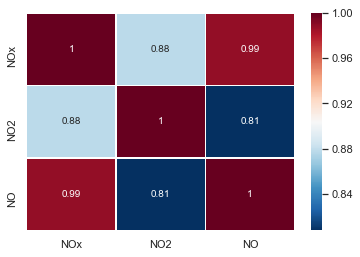

In [190]:
# Remove sites 3 and 15
removed_sites_315 = bristol_air[(bristol_air.SiteID != 3) & (bristol_air.SiteID != 15)]

# Pearson correlation coefficient of the three pollutant columns
nitrogen_oxides = removed_sites_315[['NOx','NO2', 'NO']]
pearson_corr = nitrogen_oxides.corr(method='pearson')
sns.heatmap(pearson_corr, xticklabels=pearson_corr.columns, yticklabels=pearson_corr.columns,
            cmap='RdBu_r', annot=True, linewidth=0.5)

## 4.5 (2 points)

As expected, all the diagonal values are very strongly correlated, with the maximum correlation value of 1, given that they are paired with themselves. Obviously, all attributes are highly correlated with themselves. We also observe that the most correlated pair is NO and NOx, with a correlation coefficient of 0.99, followed by the pair NO and NO2, and lastly NO2 and NOx which are the least correlated pair out of the three possible pairs with a value of 0.88.

### CORRELATIONS BETWEEN SITES

In [191]:
# Load dataset to explore correlations between sites
bristol_air_sites = pd.read_csv('BristolAir_SiteAligned.csv', compression='bz2', header=[0,1], parse_dates=[0])

In [192]:
bristol_air_sites.head()

Date Time    NOx                                               \
   Unnamed: 0_level_1      1       2       4       6     7      10     12   
0 2009-03-14 04:00:00  10.50   15.25   21.50   23.75   8.0   53.25   19.0   
1 2009-03-14 05:00:00   9.75    9.50   11.50   23.25  10.0   30.50   19.0   
2 2009-03-15 17:00:00  67.25   88.75   66.00  163.75  36.0  203.75  155.0   
3 2009-03-17 13:00:00  71.75  124.50  135.00   96.50  38.0  172.50  338.0   
4 2009-03-17 15:00:00  82.00  125.00  104.25  106.50  36.0  193.00  321.0   

                  ...       NO                                          \
       14     16  ...        1      2      4      6    7     10     12   
0  201.75   40.0  ...     2.75   2.25   4.00   8.75  0.0  12.50    3.0   
1  138.00   42.0  ...     3.00   2.75   3.00   8.50  0.0   5.75    3.0   
2  429.00   94.0  ...    18.25  27.00  16.50  57.25  3.0  69.75   51.0   
3  734.00  196.5  ...    17.75  53.25  46.25  34.75  6.0  61.50  139.0   
4  679.00  329.0  ...    21.50  47.50  34.25  36.50  5.0  63.75  130.0   

                          
       14      16     17  
0   64.75   12.50   2.50  
1   38.50   12.25   2.25  
2  177.00   21.50  28.50  
3  345.50   71.00  47.00  
4  305.25  134.25  45.50  

[5 rows x 31 columns]

#### Explore data and its structure

In [193]:
print("Number of instances: {}".format(bristol_air_sites.shape[0]))
print("Number of attributes: {}".format(bristol_air_sites.shape[1]))

Number of instances: 14895
Number of attributes: 31


In [194]:
bristol_air_sites['NO']

,1,2,4,6,7,10,12,14,16,17
0,2.75,2.25,4.00,8.75,0.0,12.50,3.0,64.75,12.50,2.50
1,3.00,2.75,3.00,8.50,0.0,5.75,3.0,38.50,12.25,2.25
2,18.25,27.00,16.50,57.25,3.0,69.75,51.0,177.00,21.50,28.50
3,17.75,53.25,46.25,34.75,6.0,61.50,139.0,345.50,71.00,47.00
4,21.50,47.50,34.25,36.50,5.0,63.75,130.0,305.25,134.25,45.50
5,13.00,34.75,46.50,32.75,5.0,54.50,158.0,306.00,107.50,51.50
6,15.00,48.75,49.50,23.25,5.0,71.00,179.0,410.50,146.75,55.50
7,11.00,45.00,60.25,37.50,4.0,72.75,149.0,488.00,121.00,71.75
8,10.50,46.00,60.50,67.00,6.0,82.75,115.0,454.75,97.75,102.25
9,13.75,41.50,52.25,81.25,5.0,60.75,99.0,299.75,116.00,54.00


In [195]:
bristol_air_sites.describe()

NOx                                                          \
                  1             2             4             6             7   
count  14895.000000  14895.000000  14895.000000  14895.000000  14895.000000   
mean      68.493566     76.520109     88.774035    121.398617     46.393085   
std       68.135362     67.278277     72.187096    108.026320     61.831058   
min        1.250000      0.750000      3.330000      2.750000      0.000000   
25%       29.000000     33.000000     44.000000     51.250000     17.000000   
50%       52.250000     59.500000     71.250000     94.000000     29.000000   
75%       83.750000     98.500000    110.500000    155.000000     48.000000   
max      964.750000   1008.250000   1211.750000   1296.250000   1228.000000   

                                                                             \
                 10            12            14            16            17   
count  14895.000000  14895.000000  14895.000000  14895.000000  14895.000000   
mean     136.711978    153.267204    324.191674    105.674581     98.055220   
std      113.846290    119.067046    214.980989     94.249373     79.598234   
min        2.750000      2.000000      4.750000      1.000000      0.750000   
25%       62.250000     65.000000    156.750000     42.750000     41.000000   
50%      107.000000    128.000000    288.750000     80.750000     78.750000   
75%      179.500000    212.000000    455.500000    141.000000    133.625000   
max     2027.000000   1645.000000   2000.750000   1147.000000    801.250000   

           ...                 NO                                            \
           ...                  1             2             4             6   
count      ...       14895.000000  14895.000000  14895.000000  14895.000000   
mean       ...          22.447718     39.582532     31.957222     49.259633   
std        ...          34.127447     53.181351     36.189392     54.829975   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           5.000000      8.875000     11.000000     15.375000   
50%        ...          13.000000     23.000000     22.250000     33.750000   
75%        ...          25.750000     49.750000     39.250000     62.500000   
max        ...         527.500000    860.250000    675.500000    693.000000   

                                                                             \
                  7            10            12            14            16   
count  14895.000000  14895.000000  14895.000000  14895.000000  14895.000000   
mean      12.108963     54.422745     60.943001    152.795372     37.835131   
std       31.474609     60.594749     60.768008    116.061208     47.578583   
min        0.000000      0.500000      0.000000      0.500000      0.000000   
25%        1.000000     17.750000     16.000000     62.750000      8.250000   
50%        4.000000     35.750000     44.000000    128.750000     22.500000   
75%        8.000000     71.000000     86.000000    219.000000     50.500000   
max      689.000000   1103.000000    888.000000   1110.500000    603.000000   

                     
                 17  
count  14895.000000  
mean      36.123755  
std       39.889625  
min        0.000000  
25%        9.250000  
50%       24.000000  
75%       49.000000  
max      452.500000  

[8 rows x 30 columns]

In [196]:
bristol_air_sites.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 31 columns):
(Date Time, Unnamed: 0_level_1)    14895 non-null datetime64[ns]
(NOx, 1)                           14895 non-null float64
(NOx, 2)                           14895 non-null float64
(NOx, 4)                           14895 non-null float64
(NOx, 6)                           14895 non-null float64
(NOx, 7)                           14895 non-null float64
(NOx, 10)                          14895 non-null float64
(NOx, 12)                          14895 non-null float64
(NOx, 14)                          14895 non-null float64
(NOx, 16)                          14895 non-null float64
(NOx, 17)                          14895 non-null float64
(NO2, 1)                           14895 non-null float64
(NO2, 2)                           14895 non-null float64
(NO2, 4)                           14895 non-null float64
(NO2, 6)                           14895 non-null float64
(NO2, 7)      

## 4.6 (5 points)

In [197]:
# Remove 'Date Time' column
removed_date = bristol_air_sites.drop('Date Time', axis=1)
#grouped_df = removed_date.groupby(level=1, axis=1).sum()
NOx_df = removed_date['NOx']
NO2_df = removed_date['NO2']
NO_df = removed_date['NO']

### TODO: use method plot_matrix() from mpctools.extensions.mplext

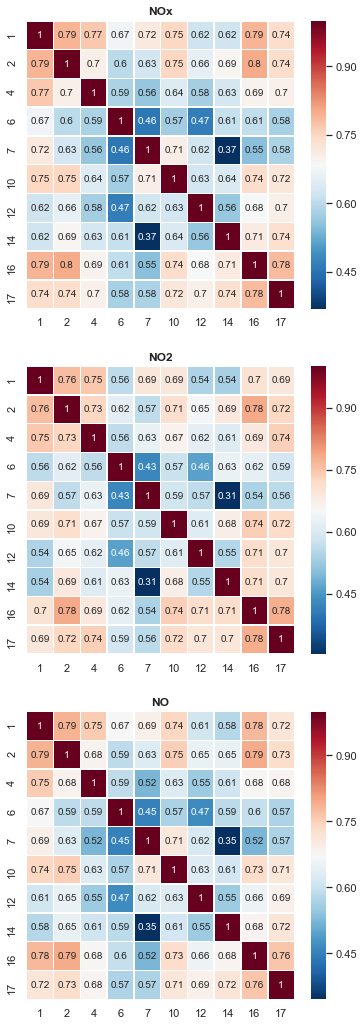

In [198]:
pollutant_labels = ['NOx', 'NO2', 'NO']
three_pollutants = [NOx_df, NO2_df, NO_df]
fig, axes = plt.subplots(3, 1, figsize=(6,18))
for i, df in enumerate(three_pollutants):
    pearson_corr = df.corr(method='pearson')
    ax = sns.heatmap(pearson_corr, xticklabels=pearson_corr.columns, yticklabels=pearson_corr.columns,
                    cmap='RdBu_r', annot=True, linewidth=0.5, ax=axes[i])
    ax.set_title(pollutant_labels[i], fontweight="bold")
    

## 4.7 (4 points)

We observe in the NO gas heatmap that the highest correlated sites are the pairs (1,2) and (2,16), both with correlation coefficient 0.79. This means that these location pairs' air pollution quantity is similar. Regarding the NO2 gas, we observe that indeed (2,16) are the highest correlated location pair, followed by (1,2). As for the NOx gas, (2,16) is the highest correlated pair followed by (1,2) and (1,16). Thus, from these observations, we can conclude that the nitrogen oxides of locations 2 and 16 are the most related out of all the sites.

In terms of the least correlated pair, in the NO heatmap the pair (7,14) is the pair with the lowest correlation coefficient, and as expected, the same location pair has the lowest value for the three gases. So, we can say that the locations 7 and 14 have the least related gases.

# Question 5: (19 points) Principal Component Analysis

In [199]:
# Readings have a temporal aspect to them

In [227]:
bristolair_day = pd.read_csv('BristolAir_DayAligned.csv', compression='bz2', parse_dates=[1])

In [233]:
bristolair_day

,SiteID,Date,0,1,2,3,4,5,6,7,...,62,63,64,65,66,67,68,69,70,71
0,1,2004-07-02,25.250000,18.000000,12.500000,9.250000,8.750000,14.500000,18.500000,30.750000,...,14.250000,13.750000,12.000000,12.500000,10.750000,10.500000,9.250000,9.000000,7.750000,10.750000
1,1,2004-07-03,22.250000,21.000000,23.500000,33.750000,15.500000,9.000000,14.000000,57.750000,...,12.000000,10.250000,11.000000,14.750000,12.500000,11.500000,5.750000,8.250000,6.250000,1.250000
2,1,2004-07-04,28.250000,22.250000,32.000000,34.500000,50.500000,76.500000,165.750000,170.000000,...,19.250000,29.750000,17.500000,26.500000,18.250000,18.750000,12.500000,14.000000,20.750000,26.000000
3,1,2004-07-05,56.750000,62.500000,79.500000,78.500000,115.750000,149.000000,175.000000,119.000000,...,19.250000,23.500000,12.000000,15.500000,12.500000,13.500000,17.750000,38.000000,39.250000,21.500000
4,1,2004-07-06,94.250000,68.250000,44.500000,47.670000,31.750000,28.250000,31.750000,55.750000,...,3.250000,2.250000,3.000000,2.000000,2.000000,1.000000,0.750000,0.750000,1.000000,0.250000
5,1,2004-07-08,28.250000,25.500000,26.250000,27.250000,29.750000,41.500000,48.000000,53.000000,...,26.500000,26.750000,22.500000,26.000000,23.250000,23.750000,20.500000,13.750000,16.000000,36.750000
6,1,2004-07-09,96.750000,78.750000,60.250000,51.750000,50.000000,55.000000,65.000000,65.750000,...,2.750000,3.000000,3.000000,3.500000,3.500000,1.000000,1.750000,3.750000,3.500000,2.500000
7,1,2004-07-10,48.000000,45.250000,45.500000,47.000000,44.750000,41.500000,39.500000,43.500000,...,4.250000,4.500000,4.250000,1.500000,1.750000,1.750000,1.500000,3.250000,1.500000,1.500000
8,1,2004-07-11,38.000000,38.250000,43.500000,48.000000,49.000000,48.500000,51.500000,64.250000,...,14.000000,20.750000,19.750000,13.750000,16.750000,18.750000,15.500000,13.000000,11.500000,11.250000
9,1,2004-07-12,69.500000,66.250000,62.500000,62.500000,65.250000,74.250000,101.000000,137.250000,...,32.250000,30.250000,26.500000,22.500000,22.500000,19.000000,15.000000,13.000000,12.000000,8.500000


## 5.1 (1 point)

In [238]:
gases_df = bristolair_day.drop(['SiteID', 'Date'], axis=1)

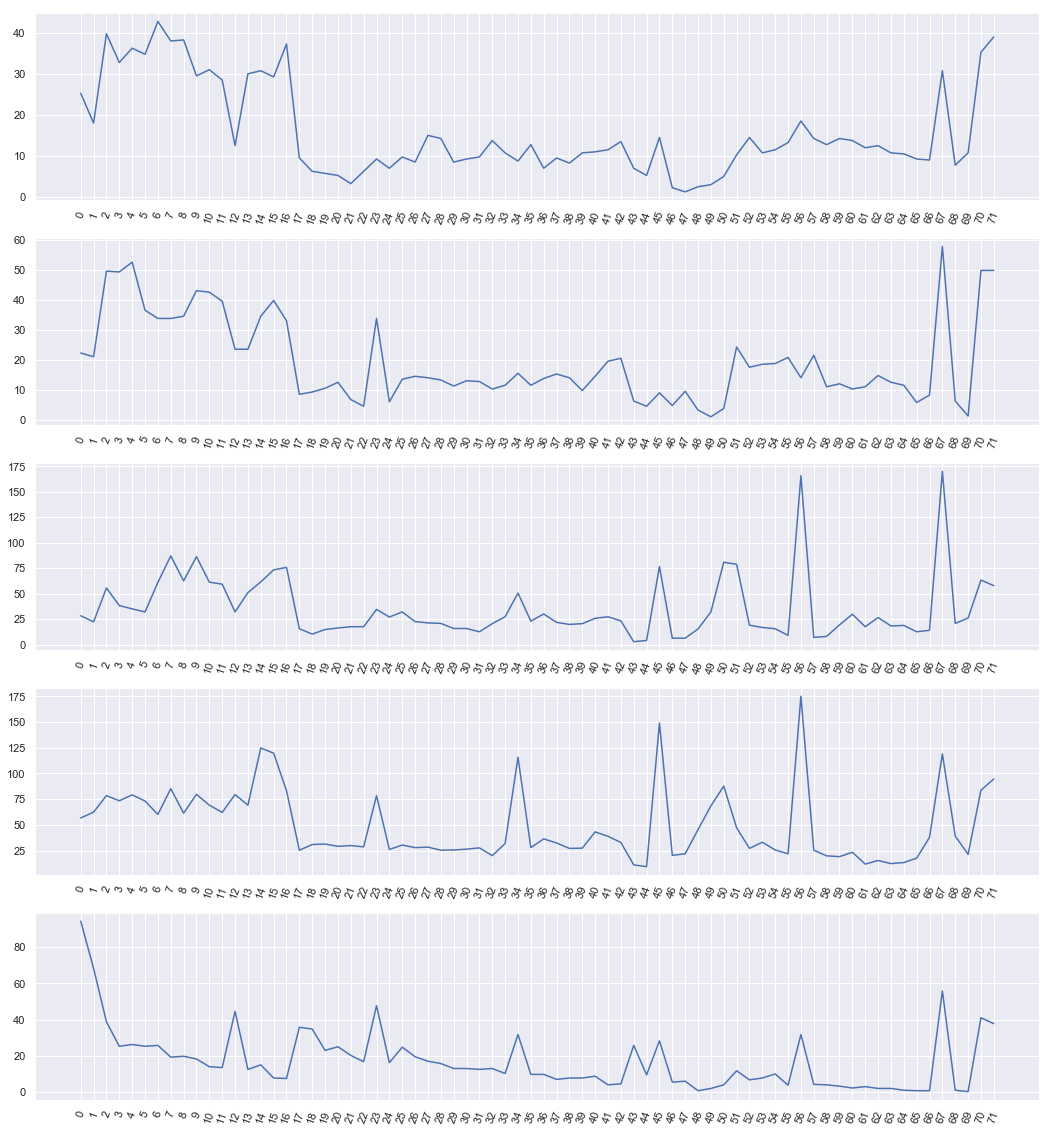

In [230]:
# Plot first five lines
fig, axes = plt.subplots(5, 1, figsize=(18, 20))
sns.set(style='darkgrid')
for i in range(5):
    ax = sns.lineplot(data=gases_df.iloc[i], ax=axes[i])
    ax.set_xticklabels(gases_df.columns.values, rotation=70)

## 5.2 (5 points)

In [240]:
bristol_site1 = bristolair_day[bristolair_day['SiteID']==1]
bristol_site1.drop(['SiteID', 'Date'], axis = 1) 

In [251]:
# Extract data from Site 1
bristol_site1 = bristolair_day[bristolair_day['SiteID']==1]
bristol_site1 = bristol_site1.drop(['SiteID', 'Date'], axis = 1) 

pca = PCA(n_components=72, random_state=0)
pca.fit(bristol_site1)

PCA(copy=True, iterated_power='auto', n_components=72, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

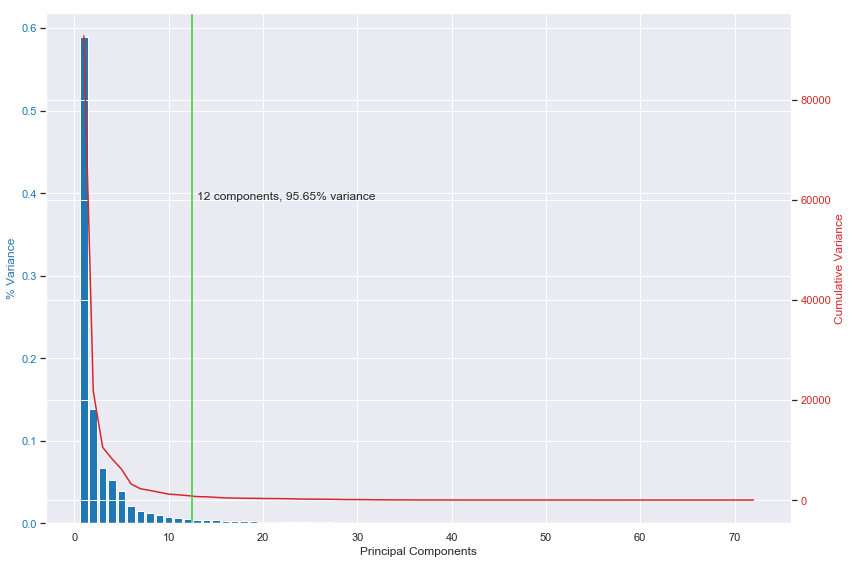

In [303]:
X = np.linspace(1, 72, num=72, endpoint=True)
fig, ax1 = plt.subplots(figsize=(12,8))

# Data
percentage_var = pca.explained_variance_ratio_ 
variance = pca.explained_variance_

# % of variance explained by each principal component (bar chart)
color = 'tab:blue'
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('% Variance', color=color)
ax1.bar(X, percentage_var, color=color)#, label='% of Variance')
ax1.tick_params(axis='y', labelcolor=color)

# Cumulative variance (line plot) explained by the first **n components*********************
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Variance', color=color)  # we already handled the x-label with ax1
ax2.plot(X, variance, color=color)#, label='Cumulative Variance')
ax2.tick_params(axis='y', labelcolor=color)

# Mark the point at which the number of components collectively explain at least 95% of the variance (vertical line)
pca_index = 0
variance_95 = 0
while (variance_95 < 0.95):
    variance_95 += percentage_var[pca_index]
    pca_index += 1
plt.axvline(pca_index+1.5, color='limegreen')
plt.text(pca_index+2, 60000, '12 components, 95.65% variance')

#plt.legend()
#plt.xticks(np.arange(1, 72, 1))
fig.tight_layout()
plt.show()

In [304]:
pca_index = 0
variance_95 = 0
while (variance_95 < 0.95):
    variance_95 += percentage_var[pca_index]
    pca_index += 1
print(pca_index)
print(variance_95)

11
0.9564611746048731


## 5.3 (2 points)

#### TODO
As expected, from the definition of PCA, we observe that both the percentage of the variance and the cumulative variance decrease as we increase the number of principal components.

## 5.4 (5 points)

## 5.5 (6 points)

# Question 6: (41 points) Regression

In [305]:
bristol_air_sites = pd.read_csv('BristolAir_SiteAligned.csv', compression='bz2', header=[0,1], parse_dates=[0])

In [315]:
# Predict NOx level for Site 17
NOx_values = bristol_air_sites['NOx']
X = NOx_values.drop('17', axis=1)
y = NOx_values['17']

## 6.1 (2 points)

In [317]:
mpctools.extensions.skext.multi_way_split()

NameError: name 'mpctools' is not defined

## 6.2 (4 points)

## 6.3 (3 points)

## 6.4 (5 points)

## 6.5 (5 points)

## 6.6 (5 points)

## 6.7 (4 points)

## 6.8 (1 point)

## 6.9 (4 points)

## 6.10 (3 points)

## 6.11 (5 points)